In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

root_folder = exp_path = Path().absolute() / "experiments" 

# Get latest generated folder
subfolder_list = [f for f in root_folder.iterdir()]
subfolder_list_creation_time = [f.stat().st_ctime for f in subfolder_list]
latest_subfolder_idx =  subfolder_list_creation_time.index(max(subfolder_list_creation_time))
experiment_path = subfolder_list[latest_subfolder_idx]

# Read CSV results
df = pd.read_csv(experiment_path / "results.csv")


In [2]:
# Config file
with open(experiment_path / "config.yml") as f:
     print(f.read())

experiment_name: many_methods
n_repeats: 10
scenario_params_list:
 - partners_count: 3
   amounts_per_partner: [0.4, 0.3, 0.3] 
   samples_split_option: 'Random'
   aggregation_weighting: 'data_volume'
   single_partner_test_mode: 'global'
   epoch_count: 38
   methods:
    - "Shapley values"
    - "Independent scores" 
    - "TMCS"
    - "ITMCS"
    - "IS_lin_S"
    - "IS_reg_S"
    - "AIS_Kriging_S"
    - "SMCS"
    - "WR_SMC"
   minibatch_count: 20
 - partners_count: 3
   amounts_per_partner: [0.9, 0.05, 0.05] 
   samples_split_option: 'Random'
   aggregation_weighting: 'data_volume'
   single_partner_test_mode: 'global'
   epoch_count: 38
   methods:
    - "Shapley values"
    - "Independent scores" 
    - "TMCS"
    - "ITMCS"
    - "IS_lin_S"
    - "IS_reg_S"
    - "AIS_Kriging_S"
    - "SMCS"
    - "WR_SMC"
   minibatch_count: 20
 - partners_count: 3
   amounts_per_partner: [0.4, 0.3, 0.3] 
   samples_split_option: 'Stratified'
   aggregation_weighting: 'data_volume'
   single_pa

In [3]:
scenario_ids = df.scenario_id.unique()
random_states = df.random_state.unique()

print('Random state', random_states)
print('Scenario id', scenario_ids)
print()

df.info()
df.head(2)

Random state [0]
Scenario id [0 1 2 3]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 26 columns):
aggregation_weighting               108 non-null object
amount_per_partner                     108 non-null float64
amounts_per_partner                    108 non-null object
computation_time                    108 non-null float64
contributivity_method               108 non-null object
contributivity_score                108 non-null float64
contributivity_scores               108 non-null object
contributivity_std                  108 non-null float64
contributivity_stds                 108 non-null object
dataset_name                        108 non-null object
epoch_count                         108 non-null float64
federated_computation_time          108 non-null float64
federated_test_score                108 non-null float64
first_characteristic_calls_count    108 non-null float64
is_early_stopping                   108 non-null float64


,aggregation_weighting,amount_per_partner,amounts_per_partner,computation_time,contributivity_method,contributivity_score,contributivity_scores,contributivity_std,contributivity_stds,dataset_name,...,partner_id,partners_count,samples_split_option,scenario_name,short_scenario_name,single_partner_test_mode,test_data_samples_count,train_data_samples_count,random_state,scenario_id
0,data_volume,0.4,"[0.4, 0.3, 0.3]",4157.131189,Shapley values,0.32905,[0.32905001 0.32595001 0.3279 ],0.0,[0. 0. 0.],MNIST,...,0.0,3.0,Random,"Random_3_[0.4, 0.3, 0.3]_['not_corrupted', 'no...","Random 3 [0.4, 0.3, 0.3]",global,10000.0,48000.0,0,0
1,data_volume,0.3,"[0.4, 0.3, 0.3]",4157.131189,Shapley values,0.32595,[0.32905001 0.32595001 0.3279 ],0.0,[0. 0. 0.],MNIST,...,1.0,3.0,Random,"Random_3_[0.4, 0.3, 0.3]_['not_corrupted', 'no...","Random 3 [0.4, 0.3, 0.3]",global,10000.0,48000.0,0,0


In [4]:
df["computation_time_minutes"] = df.computation_time / 60
df.short_scenario_name = df.samples_split_option + df.amounts_per_partner + ' mb ' + df.minibatch_count.astype(str)
df.short_scenario_name.unique()
df.contributivity_method = df.contributivity_method.str.replace('values', '')

In [5]:
# Helper function for plot
def get_x_tick_amount(df, scenario_id, partners_ids):
    
    x_ticks = []
    for partner_id in partners_ids:
        current_df = df[(df.scenario_id == scenario_id) & (df.partner_id == partner_id)]
        amount = current_df.amount_per_partner.unique()

        assert(len(amount) == 1)
        amount = amount[0]
    
        x_ticks.append('partner_' + str(partner_id) + ' ' + str(amount))
    return x_ticks




##################
scenario_id: 0
scenario name: Id 0 - Random[0.4, 0.3, 0.3] mb 20.0
aggregation_weighting: data_volume
minibatch_count: 20.0


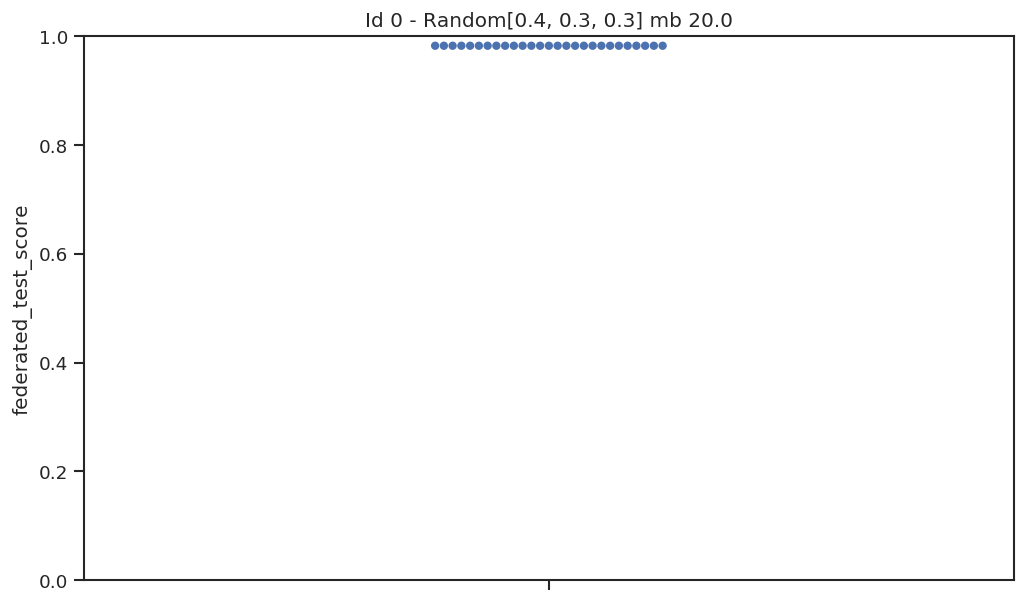

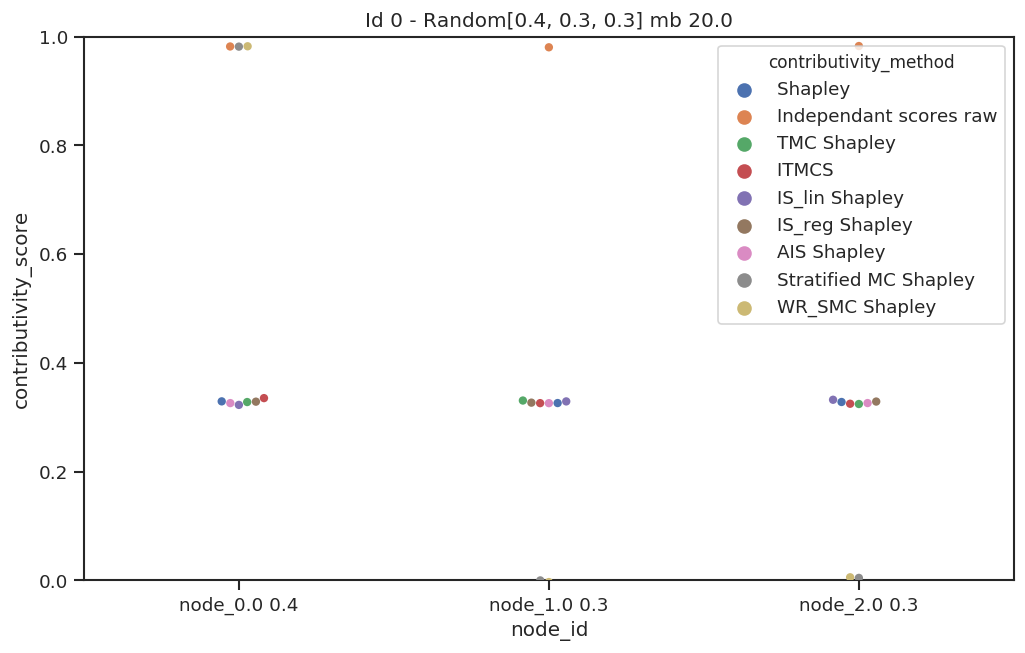

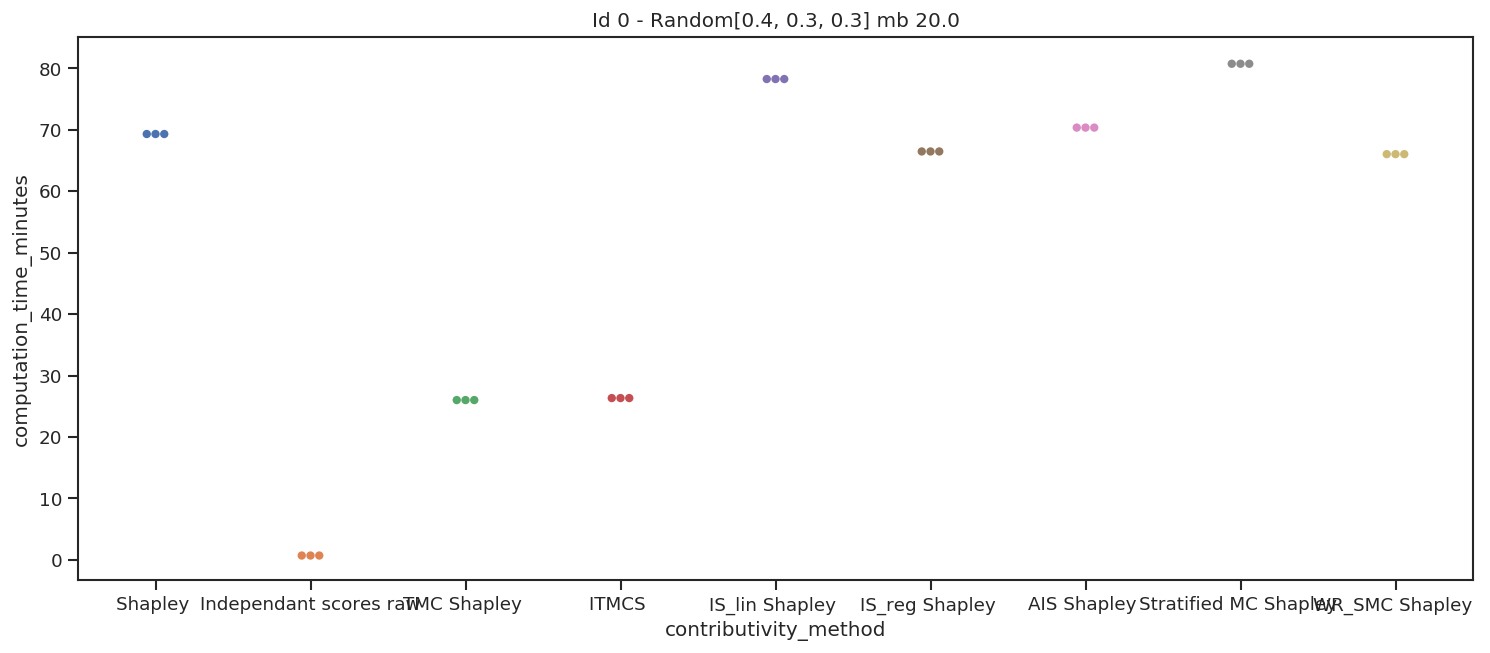

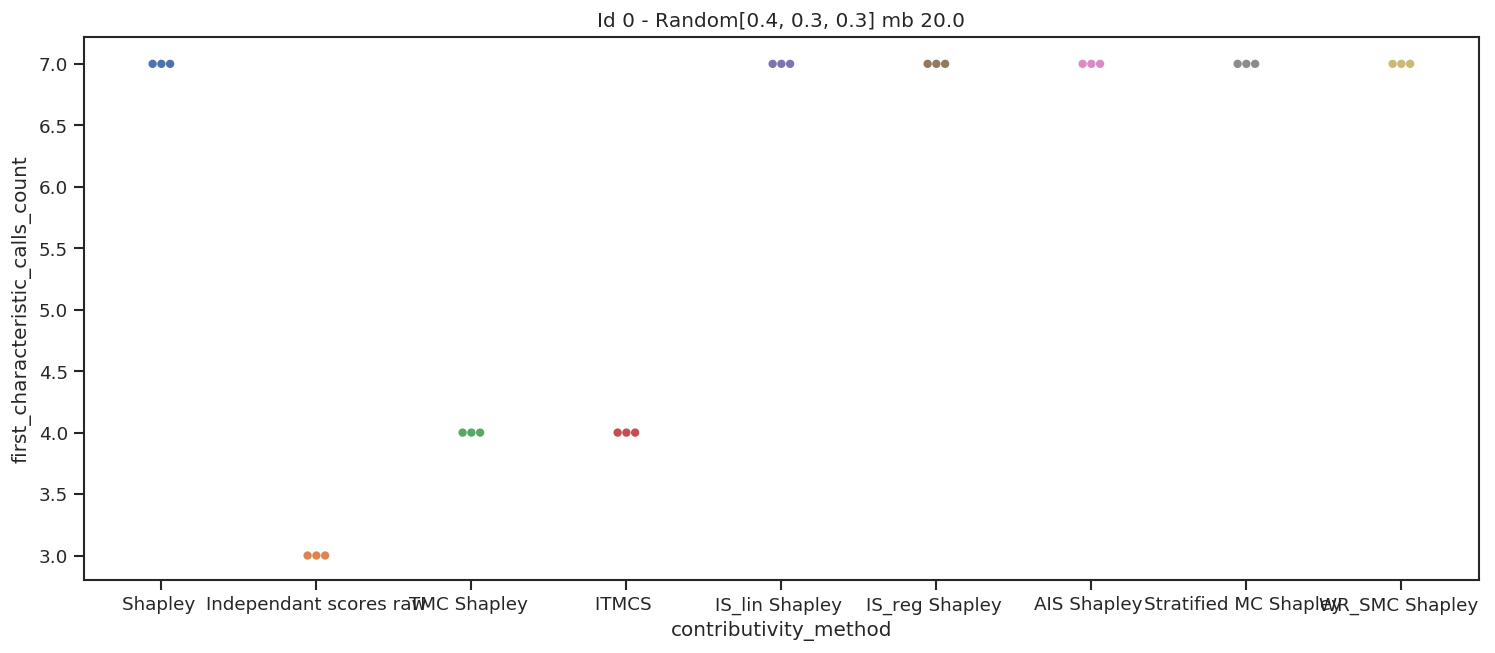




##################
scenario_id: 1
scenario name: Id 1 - Random[0.9, 0.05, 0.05] mb 20.0
aggregation_weighting: data_volume
minibatch_count: 20.0


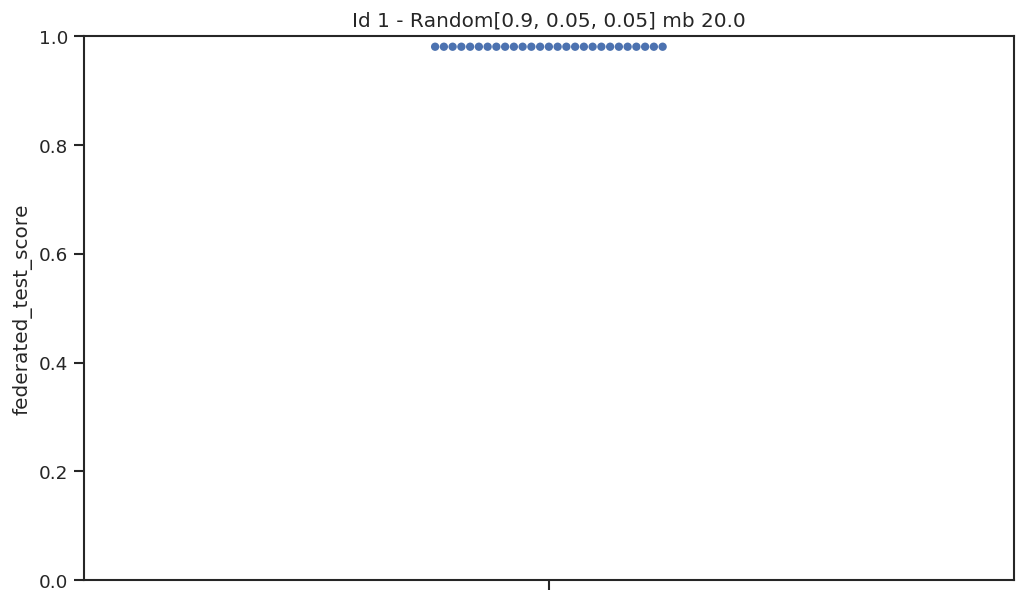

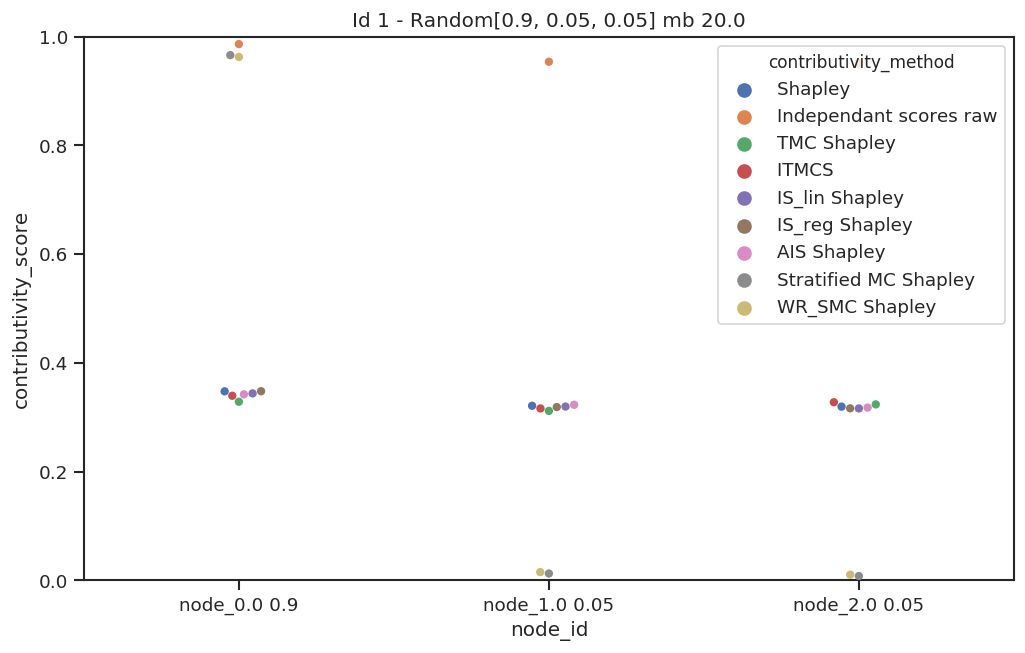

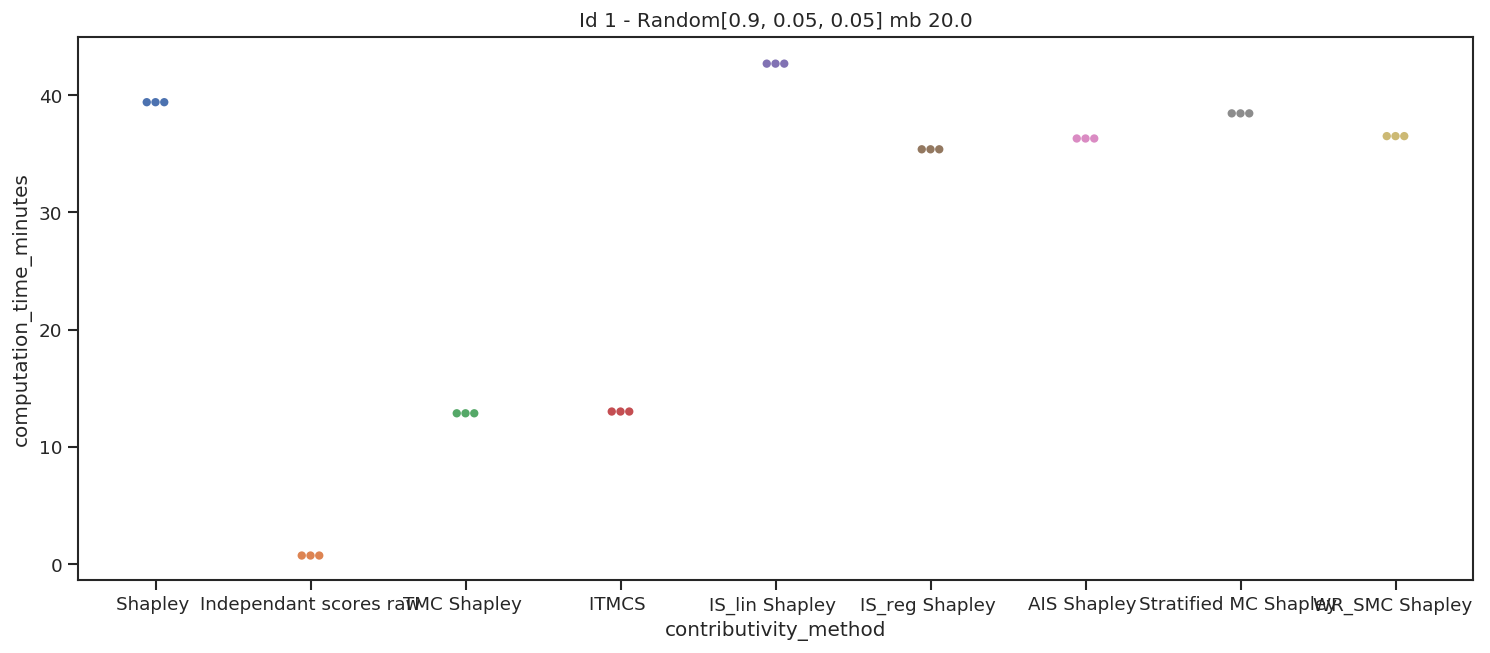

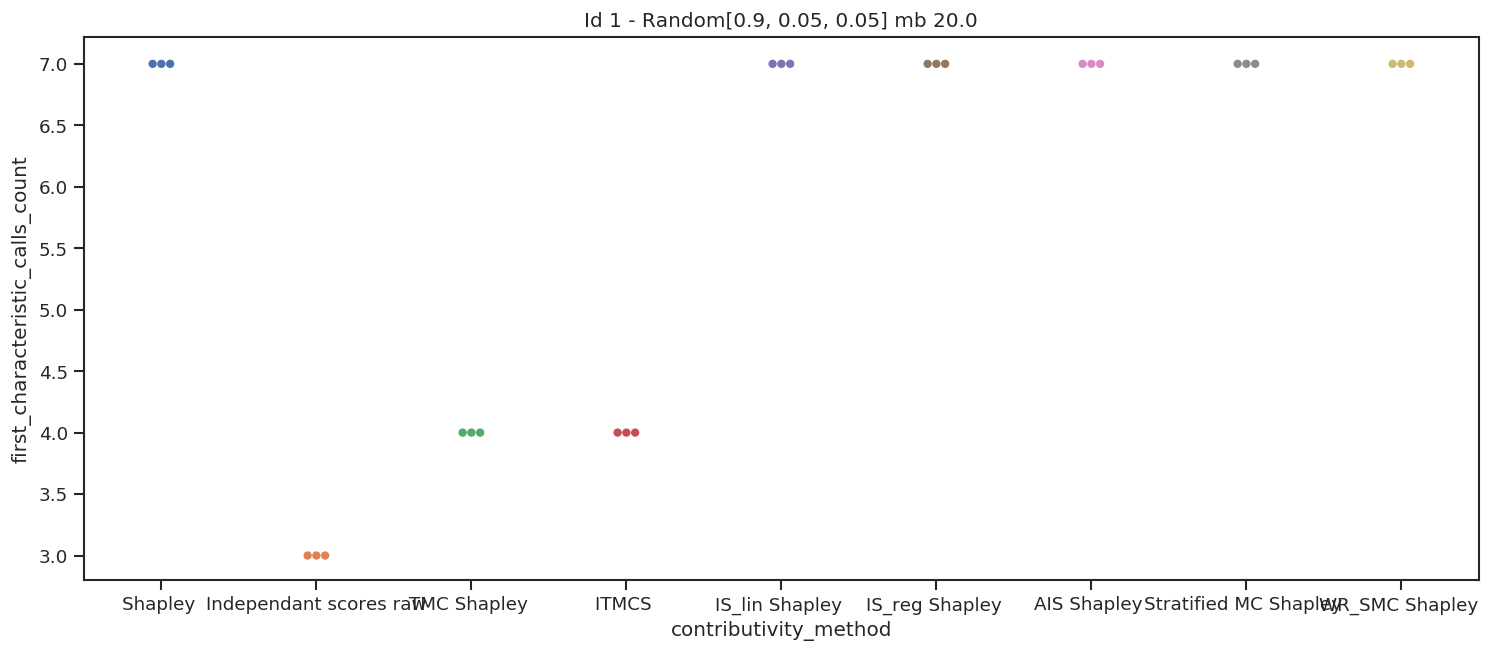




##################
scenario_id: 2
scenario name: Id 2 - Stratified[0.4, 0.3, 0.3] mb 20.0
aggregation_weighting: data_volume
minibatch_count: 20.0


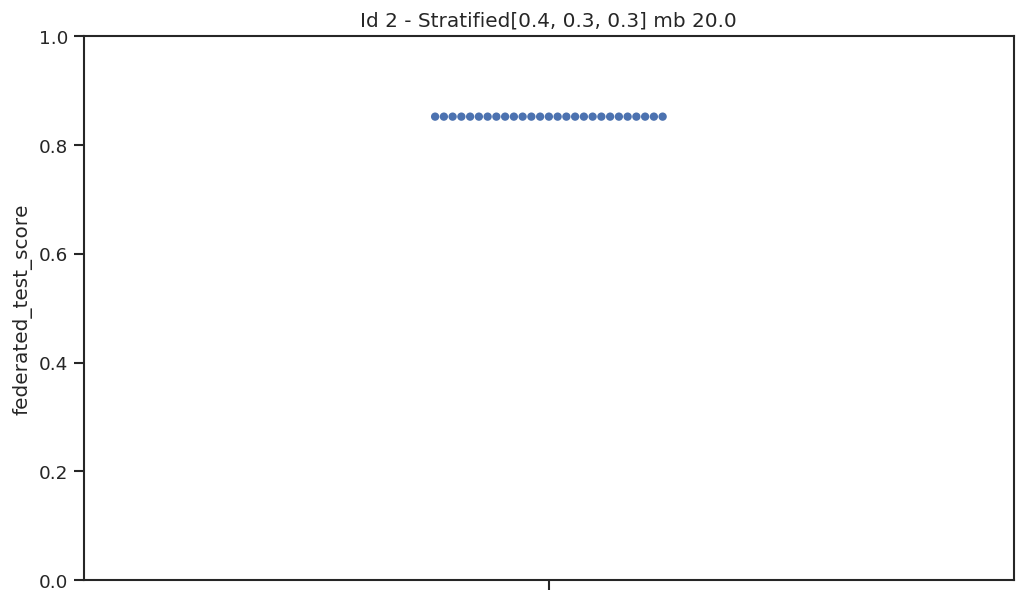

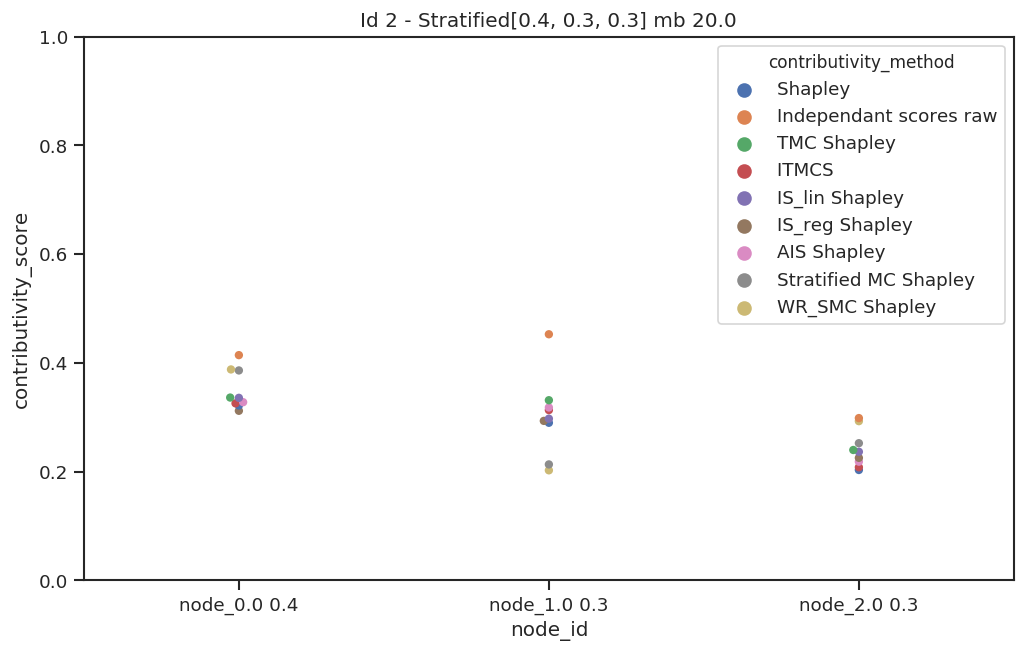

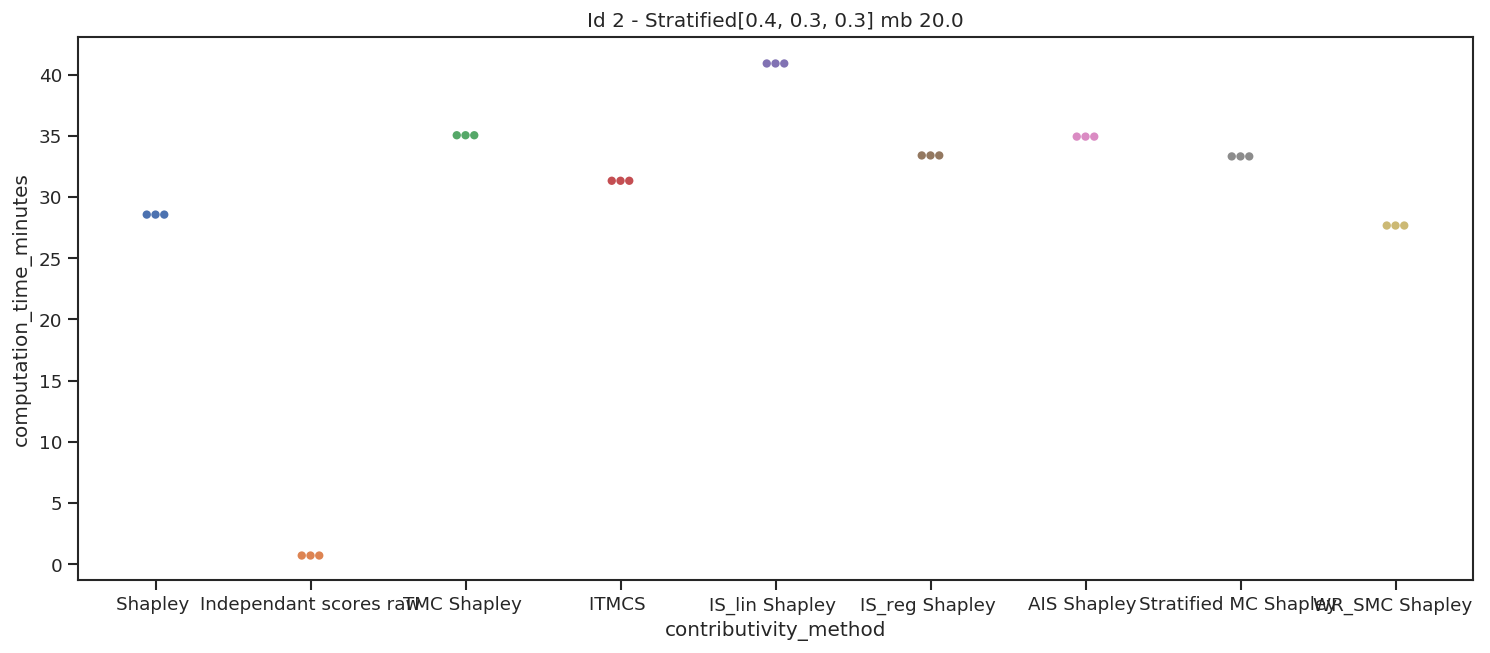

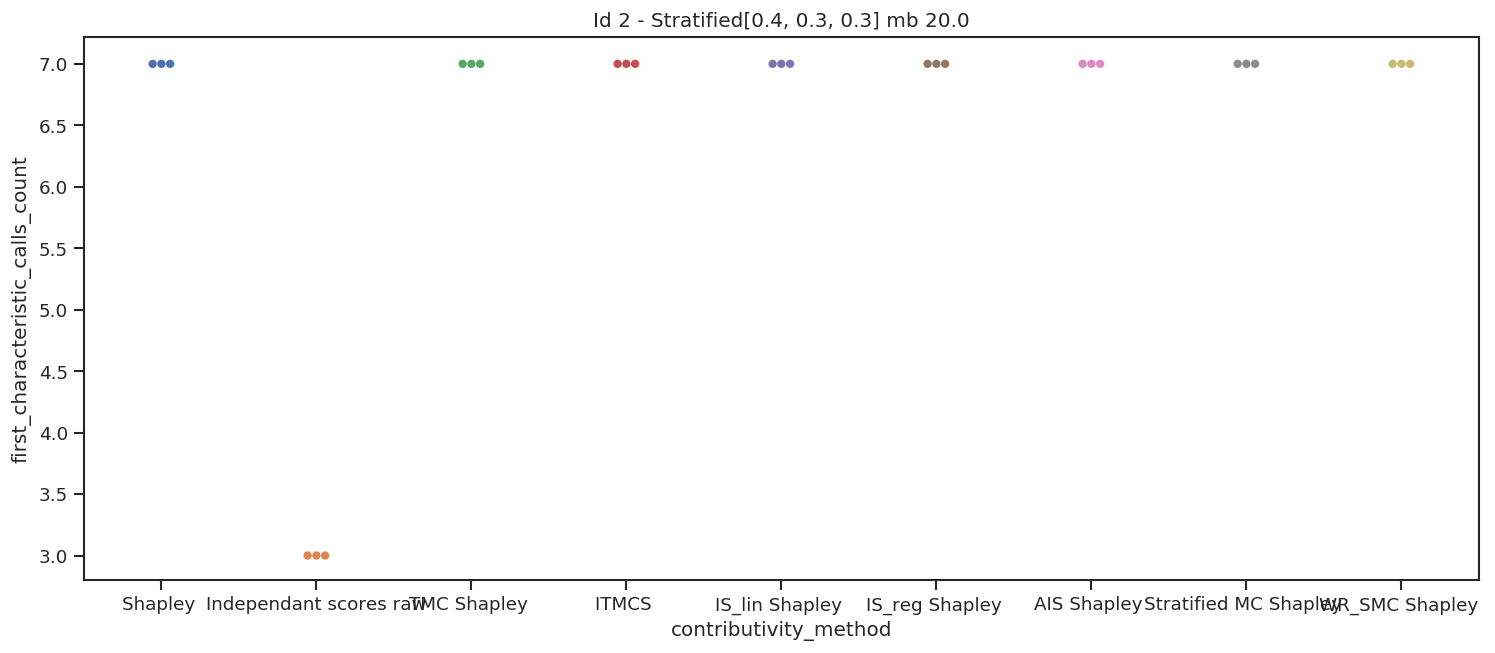




##################
scenario_id: 3
scenario name: Id 3 - Stratified[0.9, 0.05, 0.05] mb 20.0
aggregation_weighting: data_volume
minibatch_count: 20.0


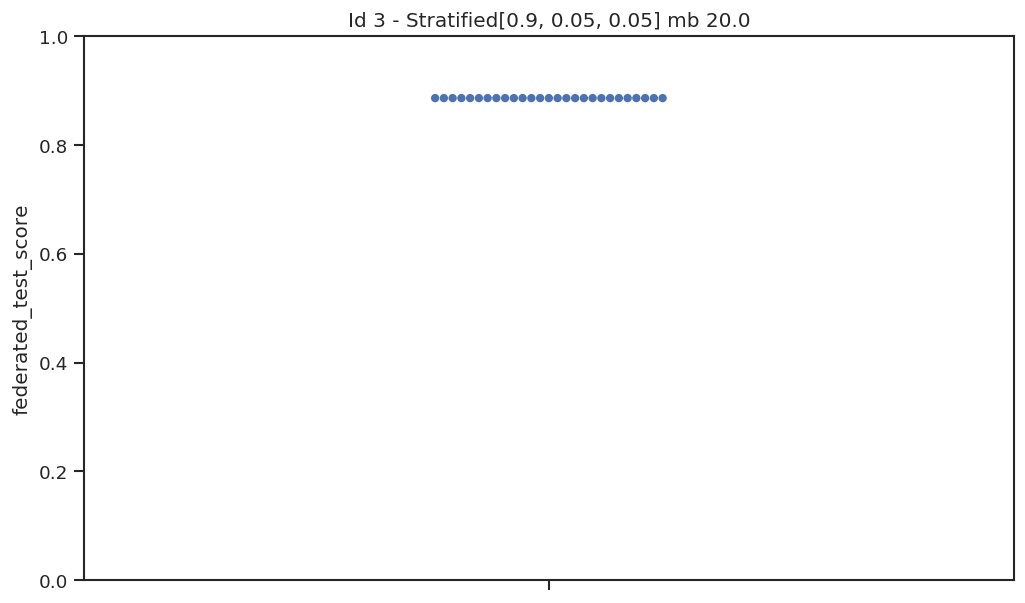

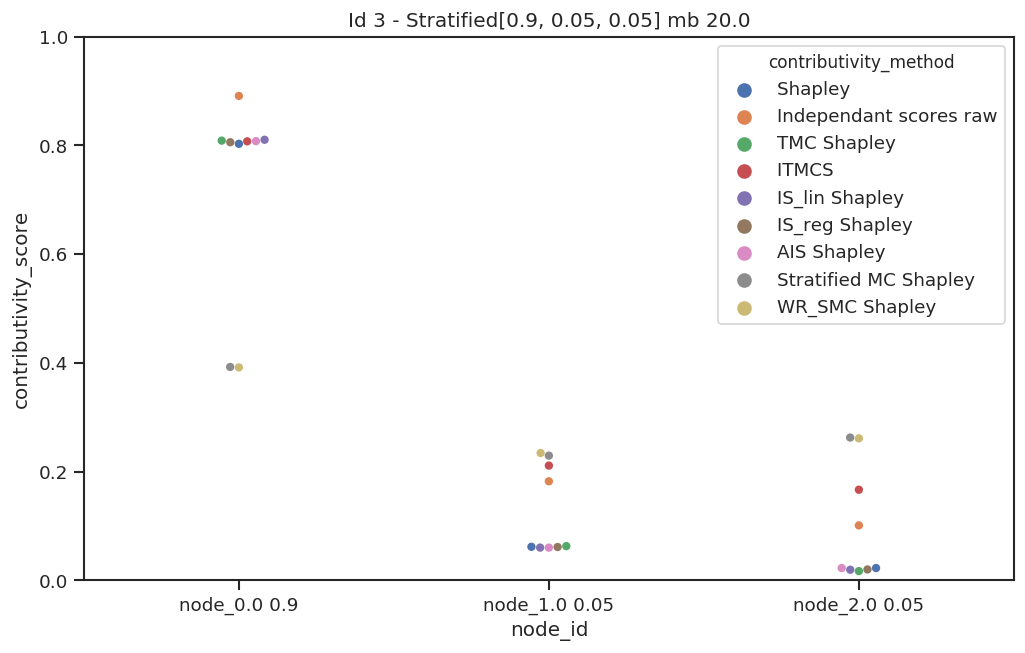

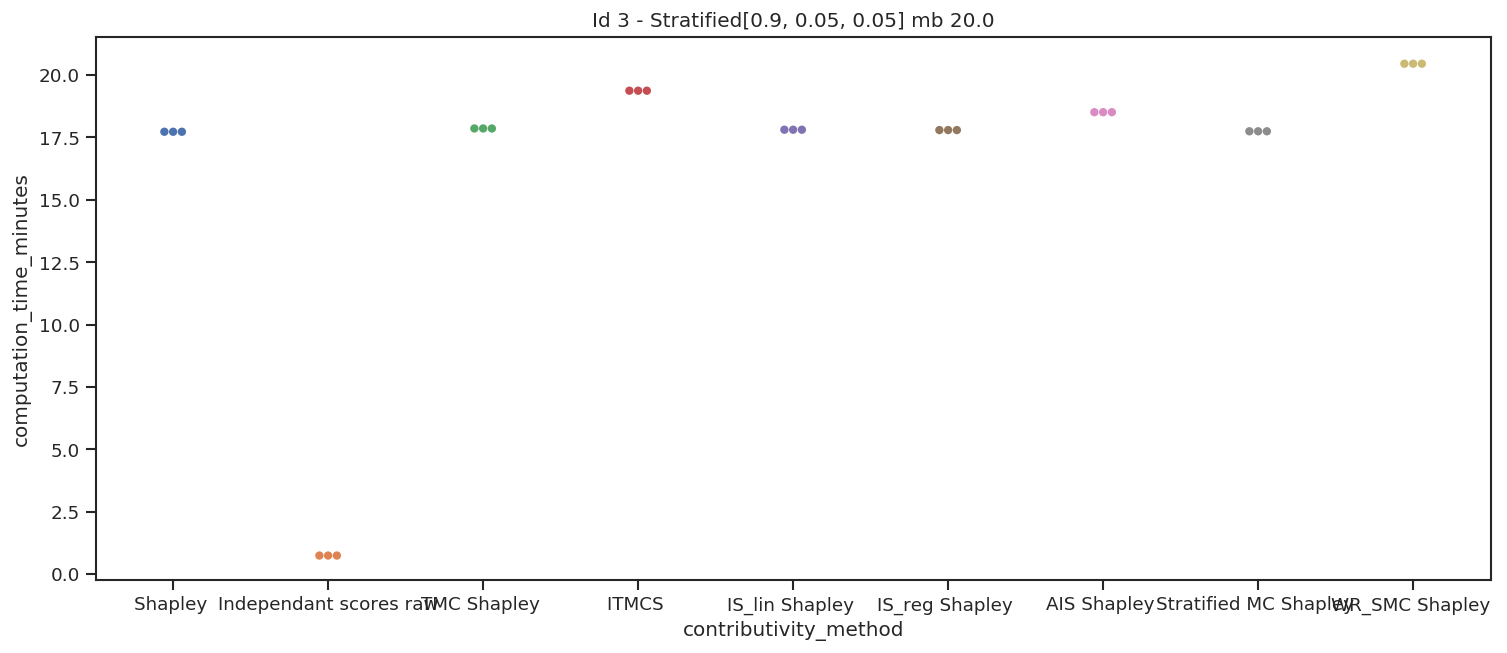

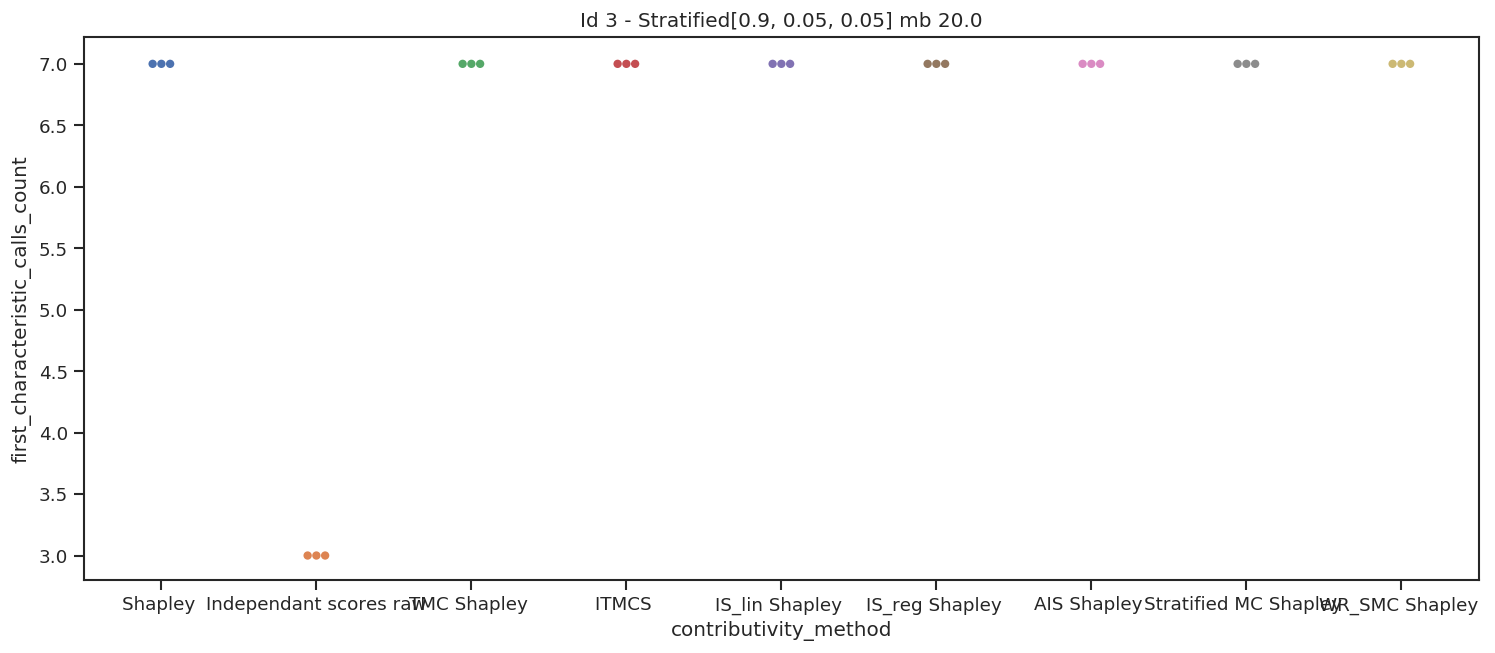

In [6]:
# Plot loop
for scenario_id in scenario_ids:
    
    current_df = df[df.scenario_id == scenario_id]
    scenario_name = "Id " + str(scenario_id) + " - " + current_df.short_scenario_name.iloc[0]
    partners_ids = current_df.partner_id.unique()
    print("")
    print("")
    print("")
    print("##################")
    print("scenario_id:", scenario_id)
    print("scenario name:", scenario_name)
    print("aggregation_weighting:", current_df.aggregation_weighting.iloc[0])
    print("minibatch_count:", current_df.minibatch_count.iloc[0])
    sns.set(style="ticks")
    #current_df.info()
    plt.figure(figsize=(10, 6), dpi=120)
    plt.title(scenario_name)
    ax = sns.swarmplot(y="federated_test_score",
                       data=current_df)
    plt.ylim([0, 1])

        
    ax = plt.figure(figsize=(10, 6), dpi=120)
    plt.title(scenario_name)
    sns.swarmplot(x="partner_id", y="contributivity_score", hue="contributivity_method",
                     data=current_df)
    plt.xticks(partners_ids, get_x_tick_amount(current_df, scenario_id, partners_ids))
    plt.ylim([0, 1])


    plt.figure(figsize=(15, 6), dpi=120)
    plt.title(scenario_name)
    ax = sns.swarmplot(x="contributivity_method", y="computation_time_minutes",
                     data=current_df)
    
    plt.figure(figsize=(15, 6), dpi=120)
    plt.title(scenario_name)
    ax = sns.swarmplot(x="contributivity_method", y="first_characteristic_calls_count",
                     data=current_df)
    
    plt.show()
    